# EDA Project Roadmap

## [1. Dataset Introduction & Project Objective](#1)

### [1.1 Dataset Source & Description](#1_1)
- **Data Source**: Origin and access details.
- **Description**: Summary of dataset content and scope.
- **Dimensions**: Shape, size, and data types.

### [1.2 Objective of the EDA](#1_2)
- **Aim**: Purpose of this exploratory analysis.
- **Research Questions**: What are we trying to discover or investigate?
- **Focus**: Business-driven or general exploratory analysis?

---

## [2. Library Setup & Data Import](#2)
- **Core Libraries**: pandas, NumPy, Matplotlib, Seaborn, Plotly Express.
- **Data Quality Tools**: missingno for missing data visualization.
- **Environment Setup**: os, warnings for a clean environment
- **Optional**: Automated EDA tools like ydata_profiling, Dtale, or Sweetviz.

---

## [3. Initial Data Exploration](#3)

### [3.1 Dataset Overview](#3_1)
- **Summary Statistics**: .info(), .head(), .shape, .dtypes
- **Missing Values**: Count and percentage of missing values per column
- **Duplicates & Constants**: Presence of duplicate rows and constant columns
- **Categorical Features**: Value counts and consistency checks
- **Inconsistent Values**: Unexpected or out-of-range values
- **Date Range**: Validation of date fields (if applicable)

### [3.2 Observations & Questions Raised](#3_2)
- **Initial Insights**: Notable observations and potential issues
- **Data Questions**: Hypotheses or questions for further investigation

---

## [4. Handling missing values, Data Cleaning & Structuring](#4)

### [4.1 Rename Columns (Clean & Consistent)](#4_1)
### [4.2 Adjust Data Types](#4_2)
### [4.3 Feature Engineering (New Columns)](#4_3)
### [4.4 Handle Missing Values](#4_4)
### [4.5 Whitespace & Formatting Cleanup](#4_5)
### [4.6 Create Logical Subsets / DataFrames](#4_6)

---

## [5. Exploratory Data Analysis (EDA)](#5)

### [1. Univariate Analysis (Variable distribution, skewness, and outlier checks).](#5_1)
### [2. Bi variate Analysis (Relationships between target and individual variables).](#5_2)
### [3. Multi variate Analysis (Correlation, clustering tendencies, and group behavior).](#5_2)

---

## [6. Key Insights & Summary](#6)

- **Main Findings**: Patterns, trends, and surprising insights
- **Main Findings**: Patterns, trends, and surprising insights
- **Visual Interpretations**: Insights backed by visualizations
- **Future Directions**: Suggestions for further analysis or modeling

<a id='1'></a>

# 1. **Dataset Introduction & Project Objective**

![Cover Image](image_name.jpeg)

---

<a id='1_1'></a>
## 1.1 **Dataset Source & Description**

The dataset used in this project is sourced from **Kaggle** and contains a comprehensive collection of records related to **[XXXX main_target]**. It consists of **XXXX records** and **XX features**, capturing various attributes relevant to the analysis.

### 🔑 Key Features Overview:
- **'1'**: (Categorical) — [Brief description if known]
- **'2'**: (Numerical) — [e.g., continuous value, score, count]
- **'3'**: (Categorical) — [e.g., type, category, flag]
- **'4'**: (Categorical) — [e.g., label, status]
- **'5'**: (Categorical) — [e.g., source, class]

The dataset may also contain date/time variables, identifiers, or derived metrics. Each feature will be evaluated in detail during the analysis process.

---

<a id='1_2'></a>
## 1.2 **Objective of the EDA**

The primary objective of this **Exploratory Data Analysis (EDA)** is to extract meaningful insights, understand the structure of the data, and support potential future modeling.

### 🎯 Key Goals:
1. Understand the distribution and variability of key features.
2. Identify and handle missing or anomalous data.
3. Investigate relationships between variables to discover patterns.
4. Detect and visualize outliers or unexpected behaviors.
5. Develop hypotheses that could inform predictive modeling or business decisions.

This EDA will serve as the foundational step in shaping downstream tasks such as feature selection, model training, or reporting.

<a id='2'></a>

## 2. **Library Setup & Data Import**

### 🛠️ Environment Setup

In [1]:
# Install necessary libraries (if not already installed)
%pip install missingno

# Import essential libraries
import os
import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import ast
from empiricaldist import Cdf, Pmf  # For empirical distribution visualizations

# Configure environment
warnings.filterwarnings('ignore')      # Suppress warnings
np.random.seed(42)                     # Set random seed for reproducibility
plt.style.use('seaborn-v0_8')              # Optional: Set preferred plot style


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
    # Load the raw dataset
    df_raw = pd.read_csv('H:\python\Template\Template_dataset.csv')

<a id='3'></a>
# 3. **Initial Data Exploration**

<a id='3_1'></a>
## 3.1. **Dataset Overview & Data Quality Assessment**

---

### 🔎 Basic Dataset Preview

In [3]:
# Display first few rows of the dataset
df_raw.head()

,Transaction_ID,Date,Customer_Name,Product_Category,Product_Name,Price,Quantity,Total_Cost,Payment_Method,Discount_Applied,Features,Product_Details,Customer_Rating,Loyalty_Score
0,TXN1000,2024-11-23,Charlie,Cl0thing,T-Shirt,190.40,1,190.40,Cash,{},{'Eco-friendly'},"('BrandC', 'Blue', 'No Warranty')",5.0/5,61
1,TXN1001,2024-02-27,Grace,Electr0nics,Tablet,475.60,4,1902.40,PayPal,"{'discount': 10, 'type': 'percentage'}","{'Eco-friendly', 'Compact', 'Waterproof'}","('BrandB', 'Blue', '1 Year')",5.0/5,61
2,TXN1002,2024-01-13,Alice,Gr0ceries,Rice,367.34,4,1469.36,Cash,"{'discount': 15, 'type': 'percentage'}","{'Eco-friendly', 'Compact', 'Waterproof'}","('BrandB', 'Black', '2 Years')",4.0/5,93
3,TXN1003,2024-05-20,Grace,Cl0thing,T-Shirt,301.34,2,602.68,Credit Card,{},"{'Eco-friendly', 'Wireless', 'Rechargeable'}","('BrandB', 'Blue', '1 Year')",4.5/5,94
4,TXN1004,2024-05-05,Emma,Electr0nics,Laptop,82.23,3,246.69,Cash,{},{'Waterproof'},"('BrandA', 'White', '2 Years')",4.0/5,23


In [4]:
# Display last few rows of the dataset
df_raw.tail()

,Transaction_ID,Date,Customer_Name,Product_Category,Product_Name,Price,Quantity,Total_Cost,Payment_Method,Discount_Applied,Features,Product_Details,Customer_Rating,Loyalty_Score
310,TXN1237,2024-01-17,Ivy,Cl0thing,Jacket,17.04,1,17.04,Credit Card,"{'discount': 10, 'type': 'percentage'}","{'Eco-friendly', 'Wireless', 'Rechargeable'}","('BrandA', 'Black', '1 Year')",5.0/5,86
311,TXN1057,2024-11-12,Faisal,Gr0ceries,Rice,102.01,3,306.03,PayPal,{},"{'Eco-friendly', 'Rechargeable', 'Waterproof'}","('BrandA', 'Blue', '2 Years')",5.0/5,9
312,TXN1218,2024-08-19,Grace,Gr0ceries,Milk,326.57,4,1306.28,PayPal,"{'discount': 15, 'type': 'percentage'}",{'Wireless'},"('BrandA', 'White', 'No Warranty')",3.5/5,71
313,TXN1045,2024-06-25,Jack,Electr0nics,Laptop,332.95,1,332.95,PayPal,"{'discount': 5, 'type': 'percentage'}",{'Eco-friendly'},"('BrandA', 'White', '2 Years')",4.5/5,89
314,TXN1182,2024-09-07,Jack,Electr0nics,Laptop,462.72,4,1850.88,PayPal,{},{'Wireless'},"('BrandA', 'White', '1 Year')",4.5/5,67


In [5]:
# Overview of dataset structure
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    315 non-null    object 
 1   Date              315 non-null    object 
 2   Customer_Name     310 non-null    object 
 3   Product_Category  315 non-null    object 
 4   Product_Name      308 non-null    object 
 5   Price             315 non-null    float64
 6   Quantity          315 non-null    int64  
 7   Total_Cost        315 non-null    float64
 8   Payment_Method    310 non-null    object 
 9   Discount_Applied  315 non-null    object 
 10  Features          315 non-null    object 
 11  Product_Details   315 non-null    object 
 12  Customer_Rating   279 non-null    object 
 13  Loyalty_Score     315 non-null    int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 34.6+ KB


In [6]:
# List all column names
print("Column names:")
print(df_raw.columns.tolist())

Column names:
['Transaction_ID', 'Date', 'Customer_Name', 'Product_Category', 'Product_Name', 'Price', 'Quantity', 'Total_Cost', 'Payment_Method', 'Discount_Applied', 'Features', 'Product_Details', 'Customer_Rating', 'Loyalty_Score']


In [7]:
# Data types of each column
print("\nData types:")
print(df_raw.dtypes)


Data types:
Transaction_ID       object
Date                 object
Customer_Name        object
Product_Category     object
Product_Name         object
Price               float64
Quantity              int64
Total_Cost          float64
Payment_Method       object
Discount_Applied     object
Features             object
Product_Details      object
Customer_Rating      object
Loyalty_Score         int64
dtype: object


In [8]:
# Summary statistics for numerical features
df_raw.describe()

,Price,Quantity,Total_Cost,Loyalty_Score
count,315.000000,315.000000,315.000000,315.000000
mean,250.246444,2.431746,614.935397,48.447619
std,146.483436,1.169248,501.815490,29.064604
min,7.510000,1.000000,8.440000,0.000000
25%,120.350000,1.000000,211.570000,25.000000
50%,258.490000,2.000000,448.830000,48.000000
75%,376.755000,4.000000,968.600000,72.000000
max,495.080000,4.000000,1944.120000,100.000000


📊 Missing Values Analysis

In [9]:
# Function to check missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_report = pd.DataFrame({
        'Feature': df.columns,
        'Missing Values': missing_values,
        'Percentage Missing': (missing_values / len(df)) * 100
    })
    return missing_report[missing_report['Missing Values'] > 0].sort_values(by='Percentage Missing', ascending=False)

print("\nChecking missing values in dataset...")
missing_report = check_missing_values(df_raw)
display(missing_report)


Checking missing values in dataset...


,Feature,Missing Values,Percentage Missing
Customer_Rating,Customer_Rating,36,11.428571
Product_Name,Product_Name,7,2.222222
Customer_Name,Customer_Name,5,1.587302
Payment_Method,Payment_Method,5,1.587302


<Axes: >

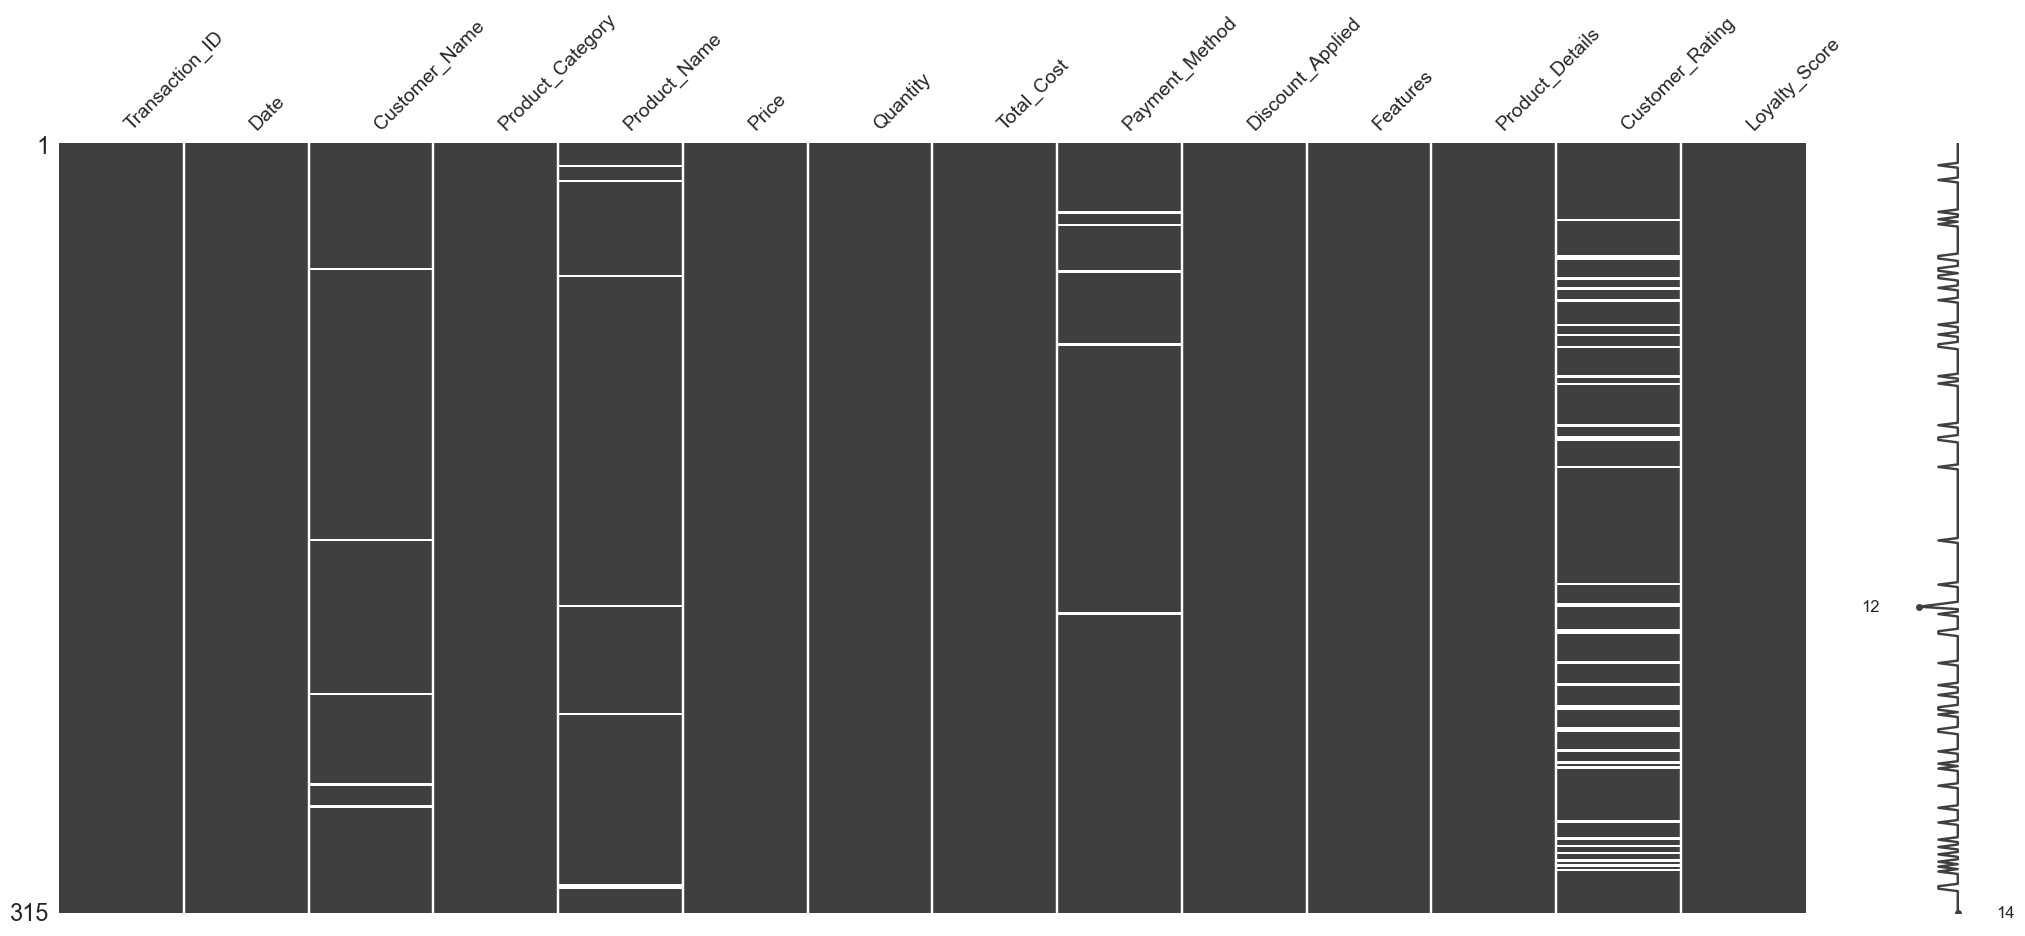

In [10]:
# Visualize missing data
msno.matrix(df_raw, fontsize=14)
# this shows the correlation between missing values, so dish liked and rate has the most and approx cost is scattered

<Axes: >

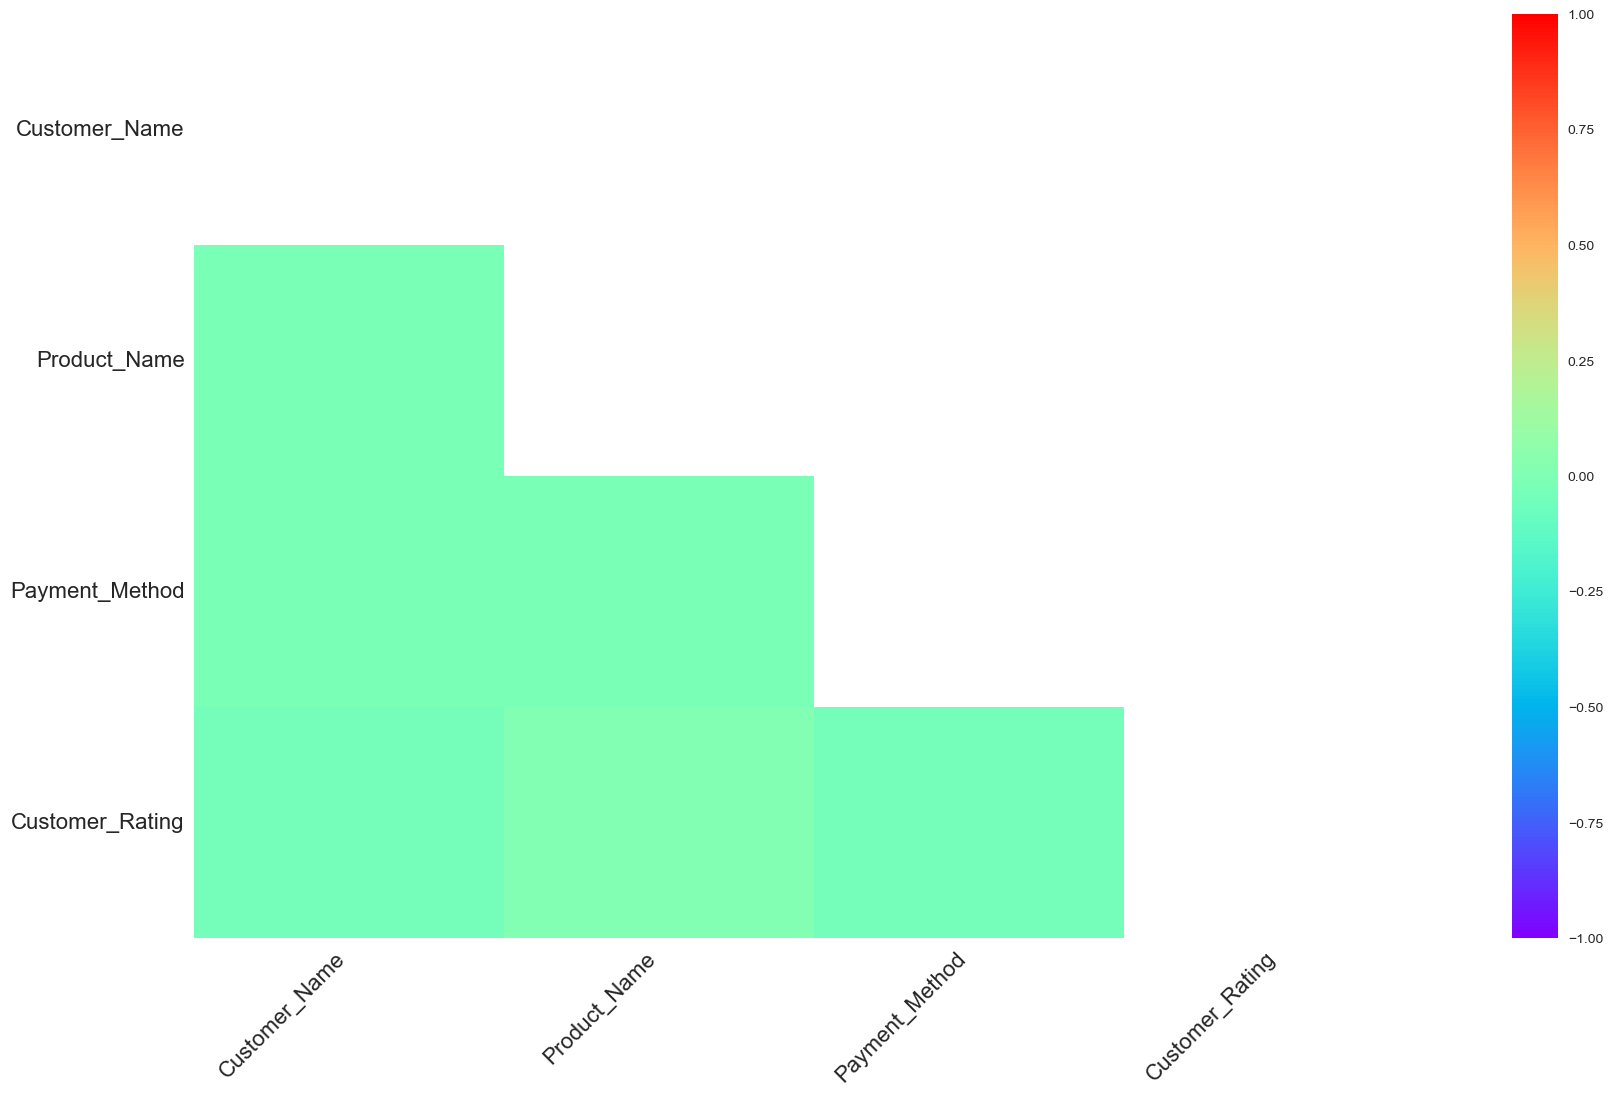

In [11]:
msno.heatmap(df_raw, cmap='rainbow')

🧹 Data Sampling and Quality Spot-Checks

In [12]:
# Random sample to spot-check
df_raw.sample(5)

,Transaction_ID,Date,Customer_Name,Product_Category,Product_Name,Price,Quantity,Total_Cost,Payment_Method,Discount_Applied,Features,Product_Details,Customer_Rating,Loyalty_Score
206,TXN1206,2024-04-18,Bob,Electr0nics,Headphones,55.23,4,220.92,PayPal,"{'discount': 10, 'type': 'percentage'}","{'Wireless', 'Rechargeable'}","('BrandA', 'Red', '2 Years')",4.5/5,12
33,TXN1033,2024-12-23,David,Cl0thing,Sweater,474.70,1,474.70,NaN,"{'discount': 10, 'type': 'percentage'}","{'Eco-friendly', 'Compact'}","('BrandA', 'Black', '1 Year')",3.5/5,43
163,TXN1163,2024-05-14,David,Cl0thing,Sweater,270.21,2,540.42,PayPal,{},"{'Wireless', 'Rechargeable', 'Compact'}","('BrandB', 'Red', '1 Year')",5.0/5,65
78,TXN1078,2024-04-17,EMMA,Cl0thing,Jeans,182.44,2,364.88,Cash,{},{'Rechargeable'},"('BrandA', 'Blue', '2 Years')",NaN,93
93,TXN1093,2024-05-18,jack,Cl0thing,Sweater,282.83,4,1116.32,Cash,"{'discount': 10, 'type': 'percentage'}","{'Eco-friendly', 'Wireless', 'Rechargeable'}","('BrandB', 'Blue', '2 Years')",5.0/5,39


In [13]:
# Inspect a specific slice of data for manual checking (example column)
if 'Discount_Applied' in df_raw.columns:
    df_raw.loc[123:150, 'Discount_Applied']

🧩 Duplicate Records Detection

In [14]:
# Check for duplicates based on a unique identifier, if available
if 'Transaction_ID' in df_raw.columns:
    duplicates = df_raw[df_raw['Transaction_ID'].duplicated(keep=False)].copy()
    print(f"\nNumber of duplicate Transaction_IDs: {duplicates.shape[0]}")
    display(duplicates['Transaction_ID'].value_counts())


Number of duplicate Transaction_IDs: 30


Transaction_ID
TXN1005    2
TXN1009    2
TXN1045    2
TXN1057    2
TXN1109    2
TXN1152    2
TXN1175    2
TXN1182    2
TXN1196    2
TXN1203    2
TXN1218    2
TXN1226    2
TXN1233    2
TXN1237    2
TXN1266    2
Name: count, dtype: int64

🗂️ Unique Values Analysis (Categorical Features)

In [15]:
# Analyzing unique values in categorical columns
print("\nAnalyzing unique values in categorical columns...")

categorical_columns = df_raw.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df_raw[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")
    
    if unique_values < 20:
        print(f"Unique values in '{column}':")
        print(df_raw[column].unique(), "\n")


Analyzing unique values in categorical columns...
Column 'Transaction_ID' has 300 unique values.
Column 'Date' has 202 unique values.
Column 'Customer_Name' has 39 unique values.
Column 'Product_Category' has 6 unique values.
Unique values in 'Product_Category':
['Cl0thing' 'Electr0nics' '  Gr0ceries  ' '  Cl0thing  ' 'Gr0ceries'
 '  Electr0nics  '] 

Column 'Product_Name' has 12 unique values.
Unique values in 'Product_Name':
['T-Shirt' 'Tablet' 'Rice' 'Laptop' 'Jeans' 'Jacket' 'Milk' nan
 'Smartphone' 'Sweater' 'Eggs' 'Headphones' 'Bread'] 

Column 'Payment_Method' has 6 unique values.
Unique values in 'Payment_Method':
['Cash' '  PayPal  ' 'Credit Card' 'PayPal' '  Credit Card  ' nan
 '  Cash  '] 

Column 'Discount_Applied' has 4 unique values.
Unique values in 'Discount_Applied':
['{}' "{'discount': 10, 'type': 'percentage'}"
 "{'discount': 15, 'type': 'percentage'}"
 "{'discount': 5, 'type': 'percentage'}"] 

Column 'Features' has 25 unique values.
Column 'Product_Details' has 36

⚠️ Special Value Checks

In [16]:
# Analyze 'Date' column frequency if present
if 'Date' in df_raw.columns:
    print("\nValue counts for 'Date' column:")
    print(df_raw['Date'].value_counts())

# Check for negative values in 'Total_Cost' column if present
if 'Total_Cost' in df_raw.columns:
    negative_billing_data = df_raw[df_raw['Total_Cost'] < 0]
    print(f"\nNumber of records with negative Total_Cost: {negative_billing_data.shape[0]}")


Value counts for 'Date' column:
Date
2024-08-04    6
2024-05-22    5
2024-04-22    4
2024-10-03    4
2024-01-17    4
             ..
2024-01-29    1
2024-06-15    1
2024-12-16    1
2024-10-12    1
2024-09-03    1
Name: count, Length: 202, dtype: int64

Number of records with negative Total_Cost: 0


In [17]:
# --------------- Categorical Consistency Check --------------- #
print("\nChecking for unexpected or inconsistent values in categorical columns...")
for column in categorical_columns:
    unique_values = df_raw[column].unique()
    print(f"Unique values for '{column}': {unique_values}\n")


Checking for unexpected or inconsistent values in categorical columns...
Unique values for 'Transaction_ID': ['TXN1000' 'TXN1001' 'TXN1002' 'TXN1003' 'TXN1004' 'TXN1005' 'TXN1006'
 'TXN1007' 'TXN1008' 'TXN1009' 'TXN1010' 'TXN1011' 'TXN1012' 'TXN1013'
 'TXN1014' 'TXN1015' 'TXN1016' 'TXN1017' 'TXN1018' 'TXN1019' 'TXN1020'
 'TXN1021' 'TXN1022' 'TXN1023' 'TXN1024' 'TXN1025' 'TXN1026' 'TXN1027'
 'TXN1028' 'TXN1029' 'TXN1030' 'TXN1031' 'TXN1032' 'TXN1033' 'TXN1034'
 'TXN1035' 'TXN1036' 'TXN1037' 'TXN1038' 'TXN1039' 'TXN1040' 'TXN1041'
 'TXN1042' 'TXN1043' 'TXN1044' 'TXN1045' 'TXN1046' 'TXN1047' 'TXN1048'
 'TXN1049' 'TXN1050' 'TXN1051' 'TXN1052' 'TXN1053' 'TXN1054' 'TXN1055'
 'TXN1056' 'TXN1057' 'TXN1058' 'TXN1059' 'TXN1060' 'TXN1061' 'TXN1062'
 'TXN1063' 'TXN1064' 'TXN1065' 'TXN1066' 'TXN1067' 'TXN1068' 'TXN1069'
 'TXN1070' 'TXN1071' 'TXN1072' 'TXN1073' 'TXN1074' 'TXN1075' 'TXN1076'
 'TXN1077' 'TXN1078' 'TXN1079' 'TXN1080' 'TXN1081' 'TXN1082' 'TXN1083'
 'TXN1084' 'TXN1085' 'TXN1086' 'TXN108

In [18]:
# --- Date Type Checking and Conversion ---
if not np.issubdtype(df_raw['Date'].dtype, np.datetime64):
    print("\nConverting 'Date' column to datetime format...")
    df_raw['Date'] = pd.to_datetime(df_raw['Date'], errors='coerce')
else:
    print("\n'Date' column is already in datetime format.")

# --- Expected Date Range ---
expected_start_date = pd.Timestamp('2000-01-01')
expected_end_date = pd.Timestamp('2030-12-31')

# --- Date Range Validation ---
invalid_dates = df_raw[(df_raw['Date'] < expected_start_date) | (df_raw['Date'] > expected_end_date)]

print(f"\nInvalid dates outside expected range: {invalid_dates.shape[0]}")
if not invalid_dates.empty:
    display(invalid_dates[['Date']])
else:
    print("✅ No dates outside the expected range found.")


Converting 'Date' column to datetime format...

Invalid dates outside expected range: 0
✅ No dates outside the expected range found.


<a id='3_2'></a>

### 3.2. Observations & Questions Raised
This section outlines key issues, improvement opportunities, and data transformation needs identified during the initial exploration.
It will guide the structured cleaning and preprocessing in the next section.

📋 Table of Observations

# | Description
1 | Rename columns to standardized, clear names.\
2 | Correct inappropriate data types (e.g., dates stored as strings, numerical columns stored as objects).\
3 | Create a new separate dataframe for XXXX-specific data and remove related columns from the main dataframe.\
4 | Create a new categorical label column XXXX_label to classify values into XXXX, XXXX, and XXXX.\
5 | Extract and create year, month, day, and quarter from Date.\
6 | Identify and remove extra whitespaces from textual data.\
7 | Replace null values in XXXX column with a meaningful default value X.\
8 | Replace empty lists with NaN in the XXXX column.\
9 | Separate key-value pairs in XXXX column into a new structure.\
10 | Flatten dictionary-like structures into separate feature columns.\
11 | Explode lists inside columns into separate rows where appropriate.\
12 | Simplify ratings to keep only the numeric value (e.g., 3.5 instead of 3.5/5).\
13 | Map and standardize sentiment categories (e.g., mostly positive, positive, etc.).\
14 | Update 0 values in critics-related column to no critics.\
15 | Ensure calculated columns (e.g., percentages) follow accurate mathematical definitions.\
16 | Format text columns to follow consistent casing (capitalize words).\
17 | Validate consistent formats in critical ID columns (e.g., no missing Transaction IDs, proper formatting).\
18 | Ensure numerical columns like Total_Cost, Discount_Applied, etc., have logical value ranges (e.g., no negative prices unless refunds are intended).\
19 | Check categorical columns for unexpected "garbage" entries (e.g., typos like Positve instead of Positive).\
20 | Confirm that date values are within a logical expected range and not futuristic or historically incorrect (already partly covered in 3.1, reinforced here).

✨ Additional Best Practices & Recommendations:

✅ Column naming convention: Adopt either snake_case (date_of_purchase) or CamelCase (DateOfPurchase) consistently.

✅ Missing value strategy: Before replacing nulls, consider whether drop, impute, or replace with default is the best depending on feature importance.

✅ Outlier handling: Later in cleaning or feature engineering, define thresholds for detecting potential outliers (especially for financial values, ratings, etc.).

✅ Early feature engineering mindset: Think about creating interaction features (e.g., Total_Cost_After_Discount) early if needed.

✅ Document assumptions: If you assume "all rates are out of 5" when simplifying ratings, document it clearly (helps when revisiting the project).

✅ Consistency checks: Perform final consistency checks after cleaning (e.g., no duplicate transaction IDs, no impossible dates).

<a id='4'></a>
## 4. Handling missing values and Data Structuring.

In this section, we will address key data quality issues identified during the initial exploration phase. This involves cleaning the dataset, handling missing values, correcting data types, and structuring the data for further analysis. The goal is to ensure the data is in the best possible format for robust analysis and modeling. We will perform the following tasks:

- Renaming columns to improve clarity

- Handling missing values and replacing them with appropriate substitutes

- Converting data types to ensure consistency and usability

- Creating new columns for better data understanding and analysis

- Performing any necessary transformations to facilitate modeling

---

<a id='4_1'></a>

4.1. Rename Columns to Appropriate Names
<a id='4_2'></a>

4.2. Correct Data Types for Relevant Columns
<a id='4_3'></a>

4.3. Create a Separate DataFrame for XXXX and Drop Original Columns
<a id='4_4'></a>

4.4. Create New XXXX_Label Column for Categorical Grouping
<a id='4_5'></a>

4.5. Extract Year, Month, Day, Quarter from Date Column
<a id='4_6'></a>

4.6. Remove Extra Whitespaces from Text Columns
<a id='4_7'></a>

4.7. Handle Missing Values in Column XXXX (Replace with 'X')
<a id='4_8'></a>

4.8. Replace Empty Lists with NaN in Column XXXX
<a id='4_9'></a>

4.9. Create New Column Separating Key-Value Pairs from Column XXXX
<a id='4_10'></a>

4.10. Flatten Dictionary from Column XXXX into Separate Columns
<a id='4_11'></a>

4.11. Explode List Structures in Column XXXX
<a id='4_12'></a>

4.12. Simplify Rating Format (e.g., 3.5 Instead of 3.5/5)
<a id='4_13'></a>

4.13. Map and Standardize Sentiment Categories
<a id='4_14'></a>

4.14. Update Column XXXX to Replace 0 with 'No Critics'
<a id='4_15'></a>

4.15. Ensure Correct Calculation of Percentual Columns
<a id='4_16'></a>

4.16. Capitalize Text Properly in XXXX Column
<a id='4_17'></a>

4.17. Validate Consistency of Critical ID Columns
<a id='4_18'></a>

4.18. Ensure Logical Ranges for Financial and Numerical Columns
<a id='4_19'></a>

4.19. Detect and Handle Unexpected Categorical Values (e.g., Typos)
<a id='4_20'></a>

4.20. Verify Date Range and Logical Date Values

In [19]:
# make a copy of the original dataframe
df = df_raw.copy()

<a id='4_1'></a>
#### 4.1. Update column names to appropriate names.

In [ ]:
new_columns = {
    'old_name':'new_name',
    'old_name':'new_name',
}

In [ ]:
df = df.rename(columns=new_columns)

In [60]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product_Category',
       'Product_Name', 'Price', 'Quantity', 'Total_Cost', 'Payment_Method',
       'Discount_Applied', 'Features', 'Product_Details', 'Customer_Rating',
       'Loyalty_Score', 'Row_Sum', 'Row_Mean', 'Row_Std'],
      dtype='object')

<a id='4_2'></a>
#### 4.2. Check the data type of each column & change it to appropriate dtype.

In [ ]:
#int (champion_id)
#df['champion_id'] = df['champion_id'].astype('Int64')
# Numeric columns
df['champion_id'] = pd.to_numeric(df['champion_id'], errors='coerce').fillna(0).astype(int)

# Datetime columns
df['release_date'] = pd.to_datetime(df['release_date'].replace('Not Released', pd.NaT).str.split(' ').str[0], errors='coerce')

# Categorical columns
df['has_online_order'] = df['has_online_order'].map({'Yes': True, 'No': False}).astype('bool')

# Float columns
df['approx_cost_two'] = df['approx_cost_two'].str.replace('[\$,]', '', regex=True).astype('float64')

# Dictionary columns
df['skill_r'] = df['skill_r'].apply(ast.literal_eval)
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x != 'nan' else np.nan)

# Set columns
df['main_role'] = df['main_role'].apply(ast.literal_eval)

<a id='4_3'></a>
#### 4.3. Create a new data frame for the XXXX including columns (XXXX, XXXX ) and drop them from the data frame

In [ ]:
api_info_df = df[['api_name','title']].copy()

In [ ]:
# Verify the columns in the new DataFrame
print(api_info_df.columns.tolist())

In [ ]:
columns_to_drop = ['api_name', 'title']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

<a id='4_4'></a>
#### 4.4. Create new XXXX_label column to be XXXX, XXXX and XXXX for  x, x, x.

In [ ]:
# Define the categories and their corresponding labels
difficulty_categories = [1, 2, 3, 4]
difficulty_labels = ['Very Easy', 'Easy', 'Medium', 'Hard']

In [ ]:
# Create a categorical column with the specified categories and labels
df['difficulty_label'] = pd.Categorical(df['difficulty'], categories=difficulty_categories, ordered=True)
df['difficulty_label'] = df['difficulty_label'].cat.rename_categories(difficulty_labels)

In [ ]:
#alternative code
df['difficulty_label'] = pd.Categorical(df['difficulty'], categories=[1, 2, 3, 4], ordered=True).cat.rename_categories(['Very Easy', 'Easy', 'Medium', 'Hard'])

<a id='4_5'></a>
#### 4.5. Create year, month, day, quarter columns from column Date.

In [ ]:
def extract_datetime_features(df, column_name, prefix='release'):
    """
    Extract datetime features from a datetime column.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the datetime column.
    - column_name (str): The name of the datetime column.
    - prefix (str): The prefix for the new column names. Defaults to 'release'.

    Returns:
    - pd.DataFrame: The DataFrame with the datetime features extracted.
    """
    try:
        # Convert the column to datetime format
        df[column_name] = pd.to_datetime(df[column_name], errors='coerce')

        # Extract datetime features
        df[f'{prefix}_year'] = df[column_name].dt.year
        df[f'{prefix}_quarter'] = df[column_name].dt.quarter
        df[f'{prefix}_month'] = df[column_name].dt.strftime('%b')
        df[f'{prefix}_month_full'] = df[column_name].dt.strftime('%B')
        df[f'{prefix}_day'] = df[column_name].dt.day
        df[f'{prefix}_day_of_week'] = df[column_name].dt.day_name()
        df[f'{prefix}_hour'] = df[column_name].dt.hour
        df[f'{prefix}_minute'] = df[column_name].dt.minute
        df[f'{prefix}_second'] = df[column_name].dt.second

        # Additional conversions
        df[f'{prefix}_date_epoch'] = df[column_name].apply(lambda x: x.timestamp() if not pd.isnull(x) else np.nan)
        df[f'{prefix}_date_iso'] = df[column_name].dt.strftime('%Y-%m-%dT%H:%M:%S')

        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = extract_datetime_features(df, 'release_date')

<a id='4_6'></a>
#### 4.6. Check for any extra white spaces and remove them.

In [ ]:
def remove_extra_white_spaces(df):
    """
    Remove extra white spaces from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to remove extra white spaces from.

    Returns:
    - pd.DataFrame: The DataFrame with extra white spaces removed.
    """
    try:
        string_cols = df.select_dtypes(include=['object', 'string']).columns
        has_extra_spaces = df[string_cols].apply(lambda x: x.str.contains(r'\s+$|^\s+', regex=True)).any()

        if has_extra_spaces.any():
            # Strip leading and trailing whitespaces from string columns
            df.loc[:, string_cols] = df.loc[:, string_cols].apply(lambda col: col.str.strip())
            
            # Strip whitespaces from column names
            df.columns = df.columns.str.strip()
            
            # Fix white spaces inside strings (remove double spaces)
            df.loc[:, string_cols] = df.loc[:, string_cols].apply(lambda col: col.str.replace(r'\s+', ' ', regex=True))
        
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = remove_extra_white_spaces(df)

<a id='4_7'></a>
#### 4.7. Replace null values in column XXXX to be X

In [ ]:
def fill_missing_values(df, fill_values=None):
    """
    Fill missing values in a DataFrame based on data type.

    Parameters:
    - df (pd.DataFrame): The DataFrame to fill missing values in.
    - fill_values (dict): A dictionary specifying fill values for different data types. Defaults to None.

    Returns:
    - pd.DataFrame: The DataFrame with missing values filled.
    """
    if fill_values is None:
        fill_values = {
            'object': '',
            'dict': {},
            'set': set(),
            np.number: 0,
            np.datetime64: pd.Timestamp('2000-01-01')
        }

    try:
        for col in df.columns:
            if df[col].dtype == 'object':
                if df[col].apply(lambda x: isinstance(x, dict)).any():
                    df[col] = df[col].apply(lambda x: x if isinstance(x, dict) else {})
                elif df[col].apply(lambda x: isinstance(x, set)).any():
                    df[col] = df[col].apply(lambda x: x if isinstance(x, set) else set())
                else:
                    df[col] = df[col].fillna(fill_values['object'])
            else:
                dtype = df[col].dtype.type
                if dtype in fill_values:
                    df[col] = df[col].fillna(fill_values[dtype])
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = fill_missing_values(df)

<a id='4_8'></a>
#### 4.8. replace empty lists with NaN / custom value.

In [ ]:
def replace_empty_lists(x, replacement=np.nan):
    if isinstance(x, list) and len(x) == 0:
        return replacement
    return x

In [ ]:
df['menu_items'] = df['menu_items'].apply(replace_empty_lists)

<a id='4_9'></a>
#### 4.9. create new column XXXX to separate the key value pairs from column XXXX.

In [ ]:
def separate_list_elements(df, column_name, prefix='position'):
    """
    Separate list elements into new columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the list column.
    - column_name (str): The name of the column containing lists.
    - prefix (str): The prefix for the new column names.

    Returns:
    - pd.DataFrame: The DataFrame with the list elements separated into new columns.
    """
    try:
        max_len = df[column_name].apply(lambda x: len(x) if isinstance(x, list) else 0).max()
        for i in range(max_len):
            df[f'{prefix}_{i}'] = df[column_name].apply(lambda x: list(x)[i] if isinstance(x, list) and len(x) > i else np.nan)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

def extract_dict_value(df, column_name, key):
    """
    Extract dictionary values into a new column.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the dictionary column.
    - column_name (str): The name of the column containing dictionaries.
    - key (str): The key to extract from the dictionaries.

    Returns:
    - pd.DataFrame: The DataFrame with the dictionary values extracted into a new column.
    """
    try:
        df[f'{column_name}_{key}'] = df[column_name].apply(lambda x: x.get(key) if isinstance(x, dict) else np.nan)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = separate_list_elements(df, 'main_external_position')
df_raw = extract_dict_value(df_raw, 'column_with_dict', 'key')

<a id='4_10'></a>
#### 4.10. Flatten dictionary from one column into separate columns.

In [ ]:
def flatten_dict_column(df, column_name):
    """
    Flatten dictionaries in a DataFrame column into separate columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column to be flattened.
    - column_name (str): The name of the column containing dictionaries.

    Returns:
    - pd.DataFrame: The DataFrame with the dictionaries flattened.
    """
    try:
        # Step 1: Flatten the dictionary using json_normalize
        expanded_df = pd.json_normalize(df[column_name])

        # Step 2: Detect nested dictionary columns dynamically
        nested_columns = [col for col in expanded_df.columns if expanded_df[col].apply(lambda x: isinstance(x, dict)).any()]

        # Step 3: Expand nested dictionaries using json_normalize
        while nested_columns:
            expanded_dfs = []
            for col in nested_columns:
                nested_df = pd.json_normalize(expanded_df[col])
                nested_df = nested_df.add_prefix(f"{col}_")
                expanded_dfs.append(nested_df)
                expanded_df.drop(columns=[col], inplace=True)
            expanded_df = pd.concat([expanded_df] + expanded_dfs, axis=1)
            nested_columns = [col for col in expanded_df.columns if expanded_df[col].apply(lambda x: isinstance(x, dict)).any()]

        # Step 4: Convert numeric values where possible
        expanded_df = expanded_df.apply(pd.to_numeric, errors='ignore')

        # Step 5: Merge with original DataFrame
        df = pd.concat([df.drop(columns=[column_name]), expanded_df], axis=1)

        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = flatten_dict_column(df, 'stats')

<a id='4_11'></a>
#### 4.11. explode column XXXX

In [ ]:
def explode_column(df, column_name):
    """
    Explode a DataFrame column containing lists or other iterable values into separate rows.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column to be exploded.
    - column_name (str): The name of the column to be exploded.

    Returns:
    - pd.DataFrame: The DataFrame with the specified column exploded.
    """
    try:
        # Check if the column exists
        if column_name not in df.columns:
            print(f"The column '{column_name}' does not exist in the DataFrame.")
            return df

        # Check if the column contains list-like values
        if not df[column_name].apply(lambda x: isinstance(x, (list, tuple))).any():
            print(f"The column '{column_name}' does not contain list-like values.")
            return df

        # Explode the column
        df = df.explode(column_name, ignore_index=True)

        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
restaurant_contact_df = explode_column(restaurant_contact_df, 'contact_number')

<a id='4_12'></a>
#### 4.12. column rate will include only the main rate (3.5) instead of (3.5/5) after ensuring all rates are /5.

In [ ]:
def clean_rating(rating):
    """
    Clean and transform a rating string into a numeric value or keep a non-numeric value.

    Parameters:
    - rating (str): The rating string to be cleaned.

    Returns:
    - float or str: The cleaned rating.
    """
    if isinstance(rating, str):
        if '/5' in rating:
            rating = rating.split('/')[0]
        if rating.replace('.', '', 1).isdigit():
            return float(rating)
    return rating

def clean_rating_column(df, column_name):
    """
    Clean and transform a rating column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column to be cleaned.
    - column_name (str): The name of the column to be cleaned.

    Returns:
    - pd.DataFrame: The DataFrame with the specified column cleaned.
    """
    try:
        df[column_name] = df[column_name].apply(clean_rating)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = clean_rating_column(df, 'restaurant_rating')

<a id='4_13'></a>
#### 4.13. update the review_score_desc column to have only categories (mostly positive - positive - mixed - negative - mostly negative) based on the positive_percentual value

In [ ]:
def categorize_reviews(df, percentage_column, category_column):
    """
    Categorize reviews based on a percentage column.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - percentage_column (str): The name of the column with percentage values.
    - category_column (str): The name of the column to be created for categories.

    Returns:
    - pd.DataFrame: The DataFrame with the new category column.
    """
    try:
        # Ensure the percentage column is numeric
        df[percentage_column] = pd.to_numeric(df[percentage_column], errors='coerce')

        # Define bins and labels for categorization
        bins = [0, 20, 40, 60, 80, 100]
        labels = ['mostly negative', 'negative', 'mixed', 'positive', 'mostly positive']

        # Create the new category column
        df[category_column] = pd.cut(df[percentage_column], bins=bins, labels=labels, right=False, include_lowest=True)

        # Ensure the category column is categorical
        df[category_column] = df[category_column].astype('category')

        # Add 'no_reviews' category and replace NaN values
        df[category_column] = df[category_column].cat.add_categories('no_reviews')
        df[category_column] = df[category_column].fillna('no_reviews')

        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = categorize_reviews(df, 'positive_percentual', 'review_category')

<a id='4_14'></a>
#### 4.14. update the metacritic 0 to be no critics.

In [ ]:
def replace_value(df, column_name, old_value, new_value, preserve_numeric=False):
    """
    Replace a specific value in a DataFrame column with a new value.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column.
    - column_name (str): The name of the column to be updated.
    - old_value: The value to be replaced.
    - new_value: The replacement value.
    - preserve_numeric (bool): Whether to preserve the numeric nature of the column.

    Returns:
    - pd.DataFrame: The DataFrame with the updated column.
    """
    try:
        if preserve_numeric:
            df[column_name] = df[column_name].replace(old_value, np.nan)
            df[column_name] = df[column_name].fillna(new_value)
        else:
            df[column_name] = df[column_name].replace(old_value, new_value)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = replace_value(df, 'metacritic', 0, 'no_critics', preserve_numeric=True)

<a id='4_15'></a>
#### 4.15.ensure the positive_percentual column is equal to ((total_positive / total_reviews)*100).

In [ ]:
def calculate_percentage(df, numerator_column, denominator_column, result_column, decimal_places=2):
    """
    Calculate a percentage column based on two other columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - numerator_column (str): The name of the column for the numerator.
    - denominator_column (str): The name of the column for the denominator.
    - result_column (str): The name of the column to store the result.
    - decimal_places (int): The number of decimal places to round the result.

    Returns:
    - pd.DataFrame: The DataFrame with the new percentage column.
    """
    try:
        # Ensure the columns are numeric
        df[numerator_column] = pd.to_numeric(df[numerator_column], errors='coerce')
        df[denominator_column] = pd.to_numeric(df[denominator_column], errors='coerce')

        # Calculate the percentage
        df[result_column] = np.where(df[denominator_column] == 0, 0, (df[numerator_column] / df[denominator_column]) * 100)

        # Round the result
        df[result_column] = df[result_column].round(decimal_places)

        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
df = calculate_percentage(df, 'total_positive', 'total_reviews', 'positive_percentual')

<a id='4_16'></a>
#### 4.16. modify the Name column to make each name start with upper case.

In [ ]:
def title_case_with_exceptions(text, exceptions=None):
    """
    Apply title case to a string while keeping specified exceptions in lower case.

    Parameters:
    - text (str): The input string.
    - exceptions (set): A set of words to keep in lower case.

    Returns:
    - str: The formatted string.
    """
    if exceptions is None:
        exceptions = {'and', 'or', 'of', 'the', 'a', 'in', 'for', 'to', 'by'}
    
    if pd.isna(text):  
        return text
    return ' '.join([word if word.lower() in exceptions else word.capitalize() for word in text.split()])

def apply_title_case(df, columns, exceptions=None):
    """
    Apply title case with exceptions to specified columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to be updated.
    - columns (list): A list of column names to apply the transformation.
    - exceptions (set): A set of words to keep in lower case.

    Returns:
    - pd.DataFrame: The DataFrame with the updated columns.
    """
    try:
        df[columns] = df[columns].applymap(lambda x: title_case_with_exceptions(x, exceptions))
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
columns_to_fix = ['Name', 'Doctor', 'Hospital']
df = apply_title_case(df, columns_to_fix)

<a id='4_17'></a>
#### 4.17. Handle duplicates in the dataset.

In [ ]:
def handle_duplicates(df, subset=None, keep='first', inplace=True):
    """
    Check for and handle duplicate rows in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to check for duplicates.
    - subset (list or None): A list of column names to consider for duplicates. If None, all columns are considered.
    - keep (str): Strategy for handling duplicates ('first', 'last', or False to drop all).
    - inplace (bool): Whether to modify the original DataFrame.

    Returns:
    - pd.DataFrame or None: The DataFrame with duplicates handled if inplace=False; otherwise, None.
    """
    try:
        # Check for duplicates
        duplicates = df[df.duplicated(subset=subset, keep=keep)]
        print(f"Found {duplicates.shape[0]} duplicate rows.")

        # Handle duplicates
        if inplace:
            df.drop_duplicates(subset=subset, keep=keep, inplace=True)
        else:
            return df.drop_duplicates(subset=subset, keep=keep)
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
handle_duplicates(df_raw)

<a id='4_18'></a>
#### 4.18. Handle outliers in the dataset.

In [ ]:
def handle_outliers(df, column_name, method='iqr', threshold=1.5, inplace=True):
    """
    Identify and remove outliers from a DataFrame column.

    Parameters:
    - df (pd.DataFrame): The DataFrame to process.
    - column_name (str): The name of the column to check for outliers.
    - method (str): The method to use for outlier detection ('iqr').
    - threshold (float): The threshold for the IQR method.
    - inplace (bool): Whether to modify the original DataFrame.

    Returns:
    - pd.DataFrame or None: The DataFrame with outliers handled if inplace=False; otherwise, None.
    """
    try:
        if method == 'iqr':
            Q1 = df[column_name].quantile(0.25)
            Q3 = df[column_name].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            mask = (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
        else:
            raise ValueError("Unsupported method for outlier detection.")

        if inplace:
            df.drop(df[~mask].index, inplace=True)
        else:
            return df[mask]
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
handle_outliers(df_raw, 'column_name')

<a id='4_19'></a>
#### 4.19. Convert categorical columns to numerical values using encoding.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns, method='label'):
    """
    Encode categorical columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the categorical columns.
    - columns (list): A list of column names to encode.
    - method (str): The encoding method ('label' or 'onehot').

    Returns:
    - pd.DataFrame: The DataFrame with the categorical columns encoded.
    """
    try:
        if method == 'label':
            le = LabelEncoder()
            for column in columns:
                df[f'{column}_encoded'] = le.fit_transform(df[column])
        elif method == 'onehot':
            df = pd.get_dummies(df, columns=columns)
        else:
            raise ValueError("Unsupported encoding method. Choose 'label' or 'onehot'.")
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
columns_to_encode = ['categorical_column']
df_raw = encode_categorical_columns(df_raw, columns_to_encode, method='onehot')

<a id='4_20'></a>
#### 4.20. Normalize/Standardize numerical features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_numerical_features(df, columns, method='minmax'):
    """
    Scale numerical features in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the numerical columns.
    - columns (list): A list of column names to scale.
    - method (str): The scaling method ('minmax' or 'standard').

    Returns:
    - pd.DataFrame: The DataFrame with the numerical columns scaled.
    """
    try:
        if method == 'minmax':
            scaler = MinMaxScaler()
        elif method == 'standard':
            scaler = StandardScaler()
        else:
            raise ValueError("Unsupported scaling method. Choose 'minmax' or 'standard'.")
        
        scaled_data = scaler.fit_transform(df[columns])
        scaled_df = pd.DataFrame(scaled_data, columns=[f'{col}_scaled' for col in columns])
        df = pd.concat([df, scaled_df], axis=1)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

# Example usage:
numerical_columns = ['numerical_column1', 'numerical_column2']
df_raw = scale_numerical_features(df_raw, numerical_columns, method='standard')

<a id='5'></a>
## 5. Analysis and visualization of the data.

<a id='5_1'></a>
### 5.1. Univariate Analysis (Variable distribution and outlier detection).

In [ ]:
exclude_columns = ['champion_name', 'release_patch', 'ofa', 'swift', 'nb']  # Replace with actual column names
# Define numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)  # kde=True adds a density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
exclude_columns = ['champion_name', 'release_patch', 'ofa', 'swift', 'nb']  # Replace with actual column names
# Define categorical columns excluding the ones in exclude_columns
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in exclude_columns]

# Plot count plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")  # Sorted order
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [ ]:
# Define the date-related columns
date_columns = ['release_year', 'release_quarter', 'release_month', 'release_day']

# Set figure size
plt.figure(figsize=(15, 8))

# Iterate over each column and plot a count plot
for i, col in enumerate(date_columns, 1):
    plt.subplot(2, 2, i)  # Arrange plots in a 2x2 grid
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
#count plot
sns.countplot(data=df, x='has_online_order', palette='Set2')
plt.title('number of Online Ordering Availability')
plt.xlabel('Has Online Order')
plt.ylabel('Restaurant Count')
plt.show()
#this graph shows that there alot of restaurants that still don't apply online ordering which should be resolved

In [ ]:
#histogram
# Calculate Length of Stay (LOS)
df['LOS'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Plot Length of Stay distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['LOS'].dropna(), kde=True, color='blue', bins=10, edgecolor = 'black')
plt.title('Distribution of Length of Stay (LOS)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#top 10 with explosion
# Create a copy and explode 'cuisine_types'
exploded_cuisines_df = df.copy()
exploded_cuisines_df['cuisine_types'] = exploded_cuisines_df['cuisine_types'].dropna().str.split(', ')
exploded_cuisines_df = exploded_cuisines_df.explode('cuisine_types')

In [ ]:
# top 10 cuisines in the exploded DataFrame
top_cuisines = exploded_cuisines_df['cuisine_types'].value_counts().head(10)

# Bar plot for top cuisines
top_cuisines.plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('number of restaurants')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#word Cloud
from wordcloud import WordCloud

# Generate word cloud from exploded DataFrame
text = " ".join(df_exploded_dishes['popular_dishes'].dropna())

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Mentioned Popular Dishes')
plt.show()
# Its Obvious (^_^)

In [ ]:
#analysis with bins
# Define age groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age Group', hue='Gender', data=df, palette='Set2')

# Adding labels to each bar
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    
    # Add the label (count) above each bar
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,  # y-position (just above the bar)
        int(height),  # Value to display
        ha='center',   # Horizontal alignment
        va='bottom',   # Vertical alignment
        fontsize=10     # Font size of the label
    )

# Adding labels and title
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [ ]:
# Count the most common medical conditions
condition_counts = df['Medical Condition'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Set3')

# Adding labels to each bar
for p in ax.patches:
    # Get the height of each bar (the count)
    height = p.get_height()
    
    # Add the label (count) above each bar
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,  # y-position (just above the bar)
        int(height),  # Value to display
        ha='center',   # Horizontal alignment
        va='bottom',   # Vertical alignment
        fontsize=12,   # Font size of the label
        color='black'  # Text color
    )

# Adding labels and title
plt.title('Most Common Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df, palette='Set2')
plt.title('Billing Amount Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.show()

In [ ]:
#aggregation with sorting
# Calculate average LOS per doctor and reset index
doctor_performance = df.groupby('Doctor')['LOS'].mean().reset_index()

# Sort by LOS in descending order
doctor_performance = doctor_performance.sort_values(by='LOS', ascending=False)

# Select the top 10 doctors based on average LOS
top_doctors = doctor_performance.head(10)

# Plotting the top 10 doctors by average LOS
plt.figure(figsize=(10, 6))
sns.barplot(x='Doctor', y='LOS', data=top_doctors, palette='Set1')

# Adding labels and title
plt.title('Top 10 Doctors by Average Length of Stay (LOS)')
plt.xlabel('Doctor')
plt.ylabel('Average LOS (days)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#pie chart with bar plot
counts = df['state_of_sewage_system'].value_counts()

# Create the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the countplot on the first axis (axes[0])
sns.countplot(data=df, x='state_of_sewage_system', ax=axes[0])
axes[0].set_title('State of sewege system graph')

# Plot the pie chart on the second axis (axes[1])
axes[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(counts)))
axes[1].set_title('percentage of state sewage system')

# Show the plot
plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()
#most of the sewage system states are good (50%) which is a good sign, and only a small size is poor (19%)

In [ ]:
#KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['nitrogen_(mg/L)'], fill=True, color='blue', shade=True)

# Adding title and labels
plt.title('KDE of Nitrogen (mg/L)', fontsize=14)
plt.xlabel('Nitrogen (mg/L)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Correlation Analysis
# Select only numeric columns for correlation analysis
numeric_columns = df_energy.select_dtypes(include=['number'])
if not numeric_columns.empty:
    corr_matrix = numeric_columns.corr()
    plt.figure(figsize=(20, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features in CSV Dataset', fontsize=16)
    plt.show()
else:
    print("No numerical features found for correlation analysis.")

In [ ]:
# pie chart
print("\nExploring technology-specific insights...")
technology_summary = df_energy['Technology'].value_counts()
plt.figure(figsize=(12, 6))
technology_summary.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Energy Technologies in Dataset', fontsize=16)
plt.ylabel('')
plt.show()

print("\nExploratory Data Analysis completed successfully. The insights derived from EDA will guide further analysis and modeling.")